In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura y limpieza de datos

In [42]:
data = {"spam": {},
        "ham": {}}
FILENAME = 'entrenamiento_1.txt'
ALPHA = 1 
TRAINING = 0.8
TESTING = 1 - TRAINING

def sanitize(string : str):
    """Sanitizez a string, removes symbols and converts to uppercase

    Args:
        string (str): word to be sanitized

    Returns:
        str: sanitized word
    """
    return string.strip('!.,;?:()-').upper()


def add_words(category : str, words : [str]):
    """grabs a list of words, sanitizes them and adds them to the data dictionary

    Args:
        category (str): either 'spam' or 'ham'
        words (str]): list of words to be added

     Returns:
        int: number of words added to the dictionary        
    """
    for word in words:
        word = sanitize(word)
        if word:
            if word in data[category]:
                data[category][word] += 1
            else:
                data[category][word] = 1

    return len(words)


def lecture():
    """reads the file and adds the words to the data dictionary
    """
    spam = 0
    ham = 0    
    spam_words = 0
    ham_words = 0

    with open(FILENAME, 'r') as f:
        lines_to_read = int(TRAINING * sum(1 for line in f))
        f.seek(0)

        for index, line in enumerate(f):
            line = line.split('\t')
            line[1] = line[1].rstrip('\n')
            line[1].replace('.', ' ')
            line[1] = line[1].split(' ', )        

            if line[0] == 'spam':
                spam += 1
                spam_words += add_words('spam', line[1])
            else:
                ham += 1
                ham_words += add_words('ham', line[1])

            if index >= lines_to_read:
                break

        
    return spam, ham, spam_words, ham_words

spam, ham, spam_words, ham_words = lecture()

print("Palabras distintas en spam: ", len(data['spam']))
print("Palabras distintas en ham: ", len(data['ham']))
print("mensajes spam: ", spam)
print("mensajes ham: ", ham)
print("palabras spam: ", spam_words)
print("palabras ham: ", ham_words)

Palabras distintas en spam:  2793
Palabras distintas en ham:  7029
mensajes spam:  603
mensajes ham:  3850
palabras spam:  14464
palabras ham:  54833


## Modelo Naive Bayes

In [38]:
def naive_bayes(message : [str]):
    """calculates the probability of a message being spam or ham; the words MUST be sanitized beforehand

    Args:
        message (str): message to be evaluated

    Returns:
        float: probability of being spam
        float: probability of being ham
    """

    p_spam = spam / (spam + ham)
    p_ham = ham / (spam + ham)

    p_spam_prob = [0] * (len(message))
    p_ham_prob = [0] * (len(message))   

    for index, word in enumerate(message):
        word_occurence_spam = data['spam'].get(word, 0) + ALPHA
        word_occurence_ham = data['ham'].get(word, 0) + ALPHA

        p_word_spam = word_occurence_spam / (spam_words + len(data['spam']) * ALPHA)
        p_word_ham = word_occurence_ham / (ham_words + len(data['ham']) * ALPHA)

        p_spam_prob[index] = p_word_spam 
        p_ham_prob[index] = p_word_ham

    p_spam_prob.append(p_spam)
    p_ham_prob.append(p_ham)

    probability_spam = np.prod(p_spam_prob)
    probability_ham =  np.prod(p_ham_prob)

    return probability_spam, probability_ham


## Testing

Spam:  863
accuracy score:  0.9744833782569632


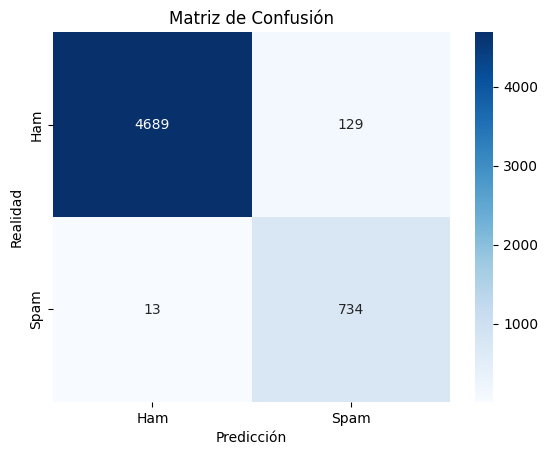

In [43]:
def read():
    with open(FILENAME, 'r') as f:
        lines = f.readlines()
    
    test_y = []
    actual_y = []

    for line in reversed(lines):
        line = line.split('\t')
        line[1] = line[1].rstrip('\n')
        line[1].replace('.', ' ')
        line[1] = line[1].split(' ', )        

        for index,word in enumerate(line[1]):
            word = word.upper()
            line[1][index] = sanitize(word)

        spam_p, ham_p = naive_bayes(line[1])

        actual_y.append(line[0])
        if spam_p > ham_p:
            test_y.append('spam')
        else:
            test_y.append('ham')
        

    return test_y, actual_y

test_y, actual_y = read()

counter = 0
for value in test_y:
    if value == 'spam':
        counter += 1
print("Spam: ", counter)

cm = confusion_matrix(actual_y,test_y)
score = accuracy_score(actual_y,test_y)
print("accuracy score: ", score)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()
        